<a href="https://colab.research.google.com/github/khalidpark/Projects/blob/main/n213a_ridge_regression_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 3*

# 📝 Assignment
---

# Ridge Regression

이번 모듈에서 배운 내용을 조금 다른 데이터를 통해 복습해 봅시다. 데이터에 대한 정보는 다음 링크를 참조해 주세요.

- [Melbourne Housing Market]('https://www.kaggle.com/anthonypino/melbourne-housing-market')

이번에도 Price 변수를 target으로 정하고 모델을 구성해 봅시다.

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
!pip install --upgrade scikit-learn

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport

# get data
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/melbourne_house_prices/MELBOURNE_HOUSE_PRICES_LESS.csv')

# drop high cardinality cols
df.drop(columns=['Suburb','Address','SellerG','Date'], inplace=True)

# drop na values in Price
df.dropna(subset=['Price'], inplace=True)

# drop duplicated rows
df.drop_duplicates(inplace=True)

In [ ]:
df

### 1) 데이터의 특성을 파악하기 위해 pandas_profiling을 사용해 보세요.

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [23]:
profile = ProfileReport(df, title="dataset")
profile

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42515 entries, 0 to 63020
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          42515 non-null  int64  
 1   Type           42515 non-null  object 
 2   Price          42515 non-null  float64
 3   Method         42515 non-null  object 
 4   Postcode       42515 non-null  int64  
 5   Regionname     42515 non-null  object 
 6   Propertycount  42515 non-null  int64  
 7   Distance       42515 non-null  float64
 8   CouncilArea    42515 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 3.2+ MB


# 특성의 종류
#### 1) 방의 개수
#### 2) 건물 타입 (Type) __ 3종류 명확하게 구분됨 -> 원핫인코딩 적용
#### 3) Price ___타겟
#### 4) Method __ 5종류 명확하게 구분됨 -> 원핫인코딩 적용
#### 5) Postcode __ 가격과 상관없는 변수라 판단됨
#### 6) 지역이름 __ 8종류 명확하게 구분됨 -> 원핫인코딩 적용
#### 7) 주변 부동산 수
#### 8) 거리 fro CBD
#### 9) Council area __ 34종류 --> 너무 높은 cardinality 예상되어 원핫인코딩 적합하지 않음
---




## 4번문제 feature selection 의 SelectKBest, k = 20 조건대로 쓰기위해 council 특성제거 없이 진행

In [25]:
# 포스트코드는 가격과 상관없는 특성이라 생각하여 제거
del df['Postcode']

In [7]:
# 원핫인코딩에 적합하지 않은 category column 제거
#del df['CouncilArea']



---



### 2) 필요한 features를 확인한 후 ont-hot encoding을 수행하세요.(use category_encoders)

### 3) 데이터를 train/test 셋으로 무작위로 나누어 주세요.(train/test = 80%/20%)

### 원핫인코딩 적용하기 전에 data 를 train 과 test로 우선 나누어준뒤에 encoding 적용 (3번 항목부터 진행)


---



##### 데이터를 8:2 로 train과 test로 나누어줌

In [26]:
len(df)

42515

In [27]:
train = df.sample(frac=0.8,random_state=1)
test = df.drop(train.index)

In [28]:
print(len(train))
print(len(test))

34012
8503


In [30]:
features = ['Rooms','Type','Method','Regionname','Propertycount','Distance','CouncilArea']
target = 'Price'

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [51]:
y_train

22479    4050000.0
19617     435000.0
21507     610000.0
36708     880000.0
4746     1690000.0
           ...    
868       395000.0
37954    2955000.0
58462     587000.0
50472     470000.0
57461     577000.0
Name: Price, Length: 34012, dtype: float64

##### category encoder 활용하여 원핫인코딩 진행

In [13]:
!pip install category_encoders

     |████████████████████████████████| 81kB 4.0MB/s 


In [31]:
from category_encoders import OneHotEncoder

encoder = OneHotEncoder(use_cat_names = True)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [32]:
X_train.head()

,Rooms,Type_h,Type_u,Type_t,Method_PI,Method_S,Method_VB,Method_SP,Method_SA,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Northern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Eastern Metropolitan,Regionname_Western Victoria,Regionname_Eastern Victoria,Regionname_Northern Victoria,Propertycount,Distance,CouncilArea_Bayside City Council,CouncilArea_Wyndham City Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Boroondara City Council,CouncilArea_Yarra City Council,CouncilArea_Brimbank City Council,CouncilArea_Kingston City Council,CouncilArea_Hume City Council,CouncilArea_Maroondah City Council,CouncilArea_Melbourne City Council,CouncilArea_Manningham City Council,CouncilArea_Glen Eira City Council,CouncilArea_Banyule City Council,CouncilArea_Monash City Council,CouncilArea_Darebin City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Whitehorse City Council,CouncilArea_Melton City Council,CouncilArea_Moreland City Council,CouncilArea_Whittlesea City Council,CouncilArea_Casey City Council,CouncilArea_Hobsons Bay City Council,CouncilArea_Maribyrnong City Council,CouncilArea_Moonee Valley City Council,CouncilArea_Knox City Council,CouncilArea_Yarra Ranges Shire Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Frankston City Council,CouncilArea_Cardinia Shire Council,CouncilArea_Macedon Ranges Shire Council,CouncilArea_Moorabool Shire Council,CouncilArea_Mitchell Shire Council,CouncilArea_Murrindindi Shire Council
22479,4,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,10579,10.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19617,3,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,13830,18.4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21507,2,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,5943,1.9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36708,2,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,7217,4.1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4746,4,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,10331,5.4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 4) feature selection을 수행하세요. (SelectKBest 사용, k = 20)

In [34]:
# target(Price)와 가장 correlated 된 features 를 k개 고르는 것이 목표입니다.

## f_regresison, SelectKBest
from sklearn.feature_selection import f_regression, SelectKBest

## selctor 정의합니다.
selector = SelectKBest(score_func=f_regression, k=20)

## 학습데이터에 fit_transform 
X_train_selected = selector.fit_transform(X_train, y_train)

## 테스트 데이터는 transform
X_test_selected = selector.transform(X_test)

X_train_selected.shape, X_test_selected.shape

((34012, 20), (8503, 20))

In [35]:
all_names = X_train.columns

## selector.get_support()
selected_mask = selector.get_support()

## 선택된 특성들
selected_names = all_names[selected_mask]

## 선택되지 않은 특성들
unselected_names = all_names[~selected_mask] 

print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)

Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Method_VB', 'Method_SP',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Northern Metropolitan',
       'Regionname_South-Eastern Metropolitan', 'Distance',
       'CouncilArea_Bayside City Council', 'CouncilArea_Wyndham City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Brimbank City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Manningham City Council',
       'CouncilArea_Melton City Council',
       'CouncilArea_Whittlesea City Council',
       'CouncilArea_Frankston City Council'],
      dtype='object')
Unselected names:  Index(['Type_t', 'Method_PI', 'Method_S', 'Method_SA',
       'Regionname_Eastern Metropolitan', 'Regionname_Western Victoria',
       'Regionname_Eastern Victoria', 'Regionname_Northern Victoria',
       'Propertycount', 'CouncilArea_Port Phillip City Council',
       



---



### 5) 선택한 features를 사용하여 best ridge regression model을 만드세요.
    - 다중 or 다항회귀를 사용하세요
    - 여러 람다값을 시도하세요
    - 람다 0인 경우를 비교하세요
    - RidgeCV를 사용하세요

In [55]:
features = ['Rooms', 'Type_h', 'Type_u', 'Method_VB', 'Method_SP',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Northern Metropolitan',
       'Regionname_South-Eastern Metropolitan', 'Distance',
       'CouncilArea_Bayside City Council', 'CouncilArea_Wyndham City Council',
       'CouncilArea_Stonnington City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Brimbank City Council', 'CouncilArea_Hume City Council',
       'CouncilArea_Manningham City Council',
       'CouncilArea_Melton City Council',
       'CouncilArea_Whittlesea City Council',
       'CouncilArea_Frankston City Council']
target = 'Price'

X_train = X_train[features]
X_test = X_test[features]

Ridge Regression, alpha=0
Test MAE: $260,308
Test R2: 0.579


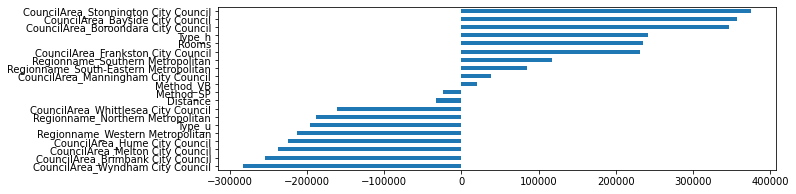

Ridge Regression, alpha=0.001
Test MAE: $260,253
Test R2: 0.579


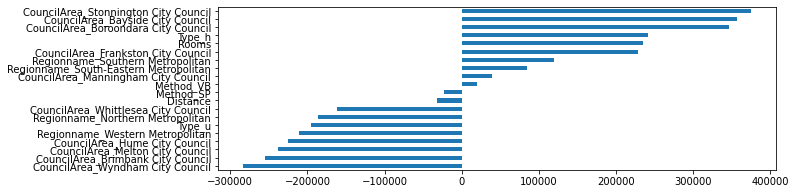

Ridge Regression, alpha=0.005
Test MAE: $260,041
Test R2: 0.579


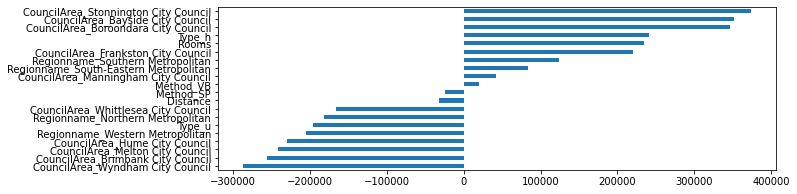

Ridge Regression, alpha=0.01
Test MAE: $259,799
Test R2: 0.578


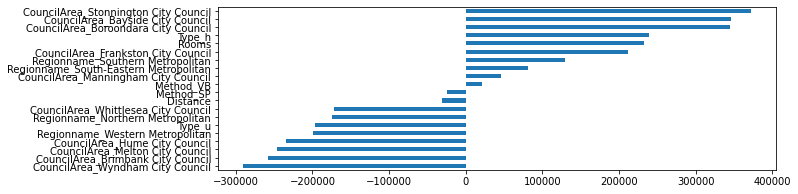

Ridge Regression, alpha=0.02
Test MAE: $259,382
Test R2: 0.578


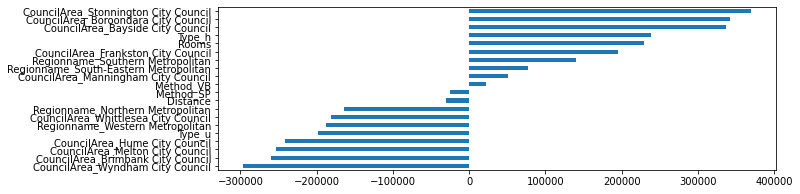

Ridge Regression, alpha=0.03
Test MAE: $259,036
Test R2: 0.577


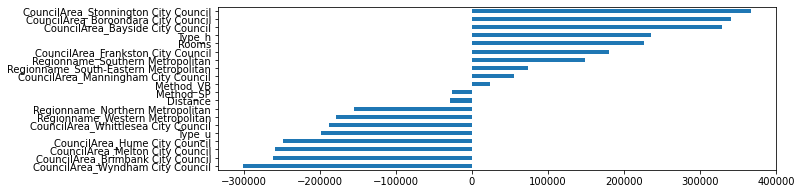

Ridge Regression, alpha=0.1
Test MAE: $257,810
Test R2: 0.571


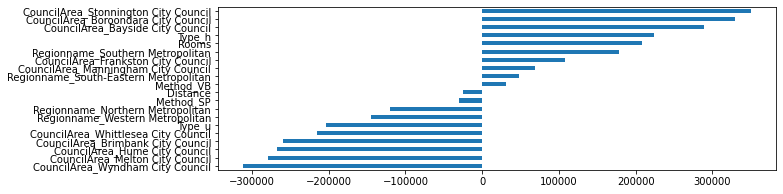

Ridge Regression, alpha=1.0
Test MAE: $283,399
Test R2: 0.466


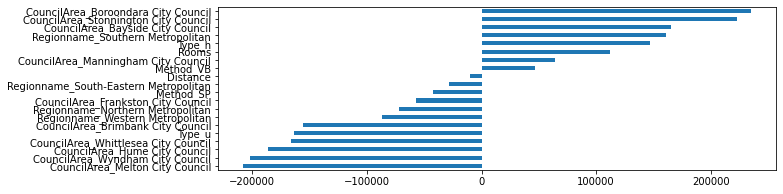

Ridge Regression, alpha=100.0
Test MAE: $422,859
Test R2: 0.017


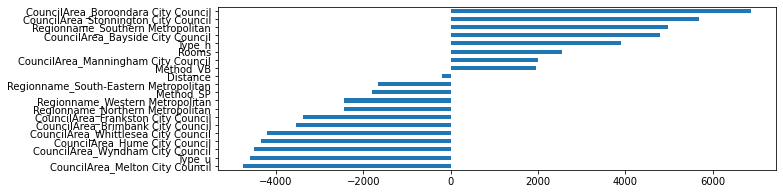

Ridge Regression, alpha=1000.0
Test MAE: $426,892
Test R2: 0.002


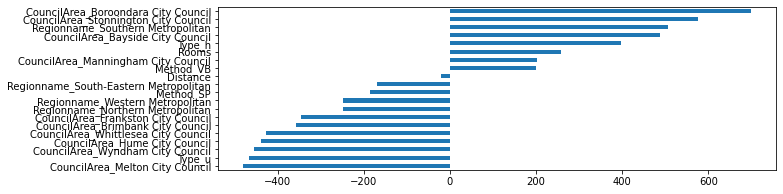

In [58]:
from sklearn.linear_model import RidgeCV , Ridge
from sklearn.metrics import r2_score , mean_absolute_error

for alpha in [0, 0.001, 0.005, 0.01, 0.02, 0.03, 0.1, 1.0, 100.0, 1000.0]:
        
    print(f'Ridge Regression, alpha={alpha}')

    # Ridge 모델 학습
    model = Ridge(alpha=alpha, normalize=True)  
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # MAE for test
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Test MAE: ${mae:,.0f}')
    print(f'Test R2: {r2:,.3f}')
    
    # plot coefficients
    coefficients = pd.Series(model.coef_, X_train.columns)
    plt.figure(figsize=(10,3))
    coefficients.sort_values().plot.barh()
    plt.show()

### alpha 0.1 ~ 1.0 구간에서 MAE 값이 최소로 파악된다

In [61]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np

In [63]:
### RigdeCV를 사용하여 최적의 alpha값을 찾아내기

def RidgeCVRegression(degree=3, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         RidgeCV(**kwargs))

alphas = np.arange(0.1, 1.0, 0.1)

model = RidgeCVRegression(alphas=alphas, normalize=True, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MAE: ${mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')

coefs = model.named_steps["ridgecv"].coef_
print(f'Number of Features: {len(coefs)}')

print(f'alpha: {model.named_steps["ridgecv"].alpha_}')
print(f'cv best score: {model.named_steps["ridgecv"].best_score_}') # best score: R2

Test MAE: $218,572
R2 Score: 0.6680

Number of Features: 1771
alpha: 0.1
cv best score: 0.6401798856566125


### 6) 테스트셋에 대한 MAE 값을 보고 모델이 잘 만들어 졌는지 확인해 보세요.

### Ridge regression을 통해 alpha가 0.1~1.0 사이일때 MAE 가 가장 낮음
### 해당 간격 사이에서 더 나은 alpha 값을 찾기 위해 RidgeCV 실시
##### (0.01 간격으로 실행하였으나 너무 시간이 오래 걸려 , 0.1 간격으로 줄여서 실행함)
### RidgeCV 결과 , alpha 가 0.1 일때 가장 낮은 MAE 모델을 갖는 걸로 확인

### 7) feature 선택 수에 따른 MAE 값 변화를 확인해 보세요

## 원핫인코딩 후 select K =20 으로 선정된 값을 고려하지 않고
## 모든 feature 특성값에 따른 MAE 값 변화를 보고자 함.

In [68]:
features = ['Rooms','Type','Method','Regionname','Propertycount','Distance','CouncilArea']
target = 'Price'

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [69]:
encoder = OneHotEncoder(use_cat_names = True)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


1 features
Selected names:  Index(['Rooms'], dtype='object')
Test MAE: $376,506
Test R2: 0.18796557230701771 

2 features
Selected names:  Index(['Rooms', 'Regionname_Southern Metropolitan'], dtype='object')
Test MAE: $340,085
Test R2: 0.35906242612567896 

3 features
Selected names:  Index(['Rooms', 'Type_u', 'Regionname_Southern Metropolitan'], dtype='object')
Test MAE: $335,784
Test R2: 0.3850397680065779 

4 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Regionname_Southern Metropolitan'], dtype='object')
Test MAE: $334,246
Test R2: 0.39318478796503387 

5 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Regionname_Southern Metropolitan',
       'CouncilArea_Boroondara City Council'],
      dtype='object')
Test MAE: $328,357
Test R2: 0.40884664089410183 

6 features
Selected names:  Index(['Rooms', 'Type_h', 'Type_u', 'Regionname_Southern Metropolitan',
       'Distance', 'CouncilArea_Boroondara City Council'],
      dtype='object')
Test MAE: $297,056


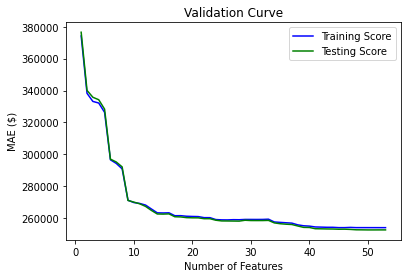

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

training = []
testing = []
ks = range(1, len(X_train.columns)+1)

# 1 부터 특성 수 만큼 사용한 모델을 만들어서 MAE 값을 비교 합니다.
for k in range(1, len(X_train.columns)+ 1):
    print(f'{k} features')
    
    selector = SelectKBest(score_func=f_regression, k=k)
    
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    
    all_names = X_train.columns
    selected_mask = selector.get_support()
    selected_names = all_names[selected_mask]
    print('Selected names: ', selected_names)

    
    model = LinearRegression()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_train_selected)
    mae = mean_absolute_error(y_train, y_pred)
    training.append(mae)
    
    y_pred = model.predict(X_test_selected)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    testing.append(mae)
    print(f'Test MAE: ${mae:,.0f}')
    print(f'Test R2: {r2} \n')

plt.plot(ks, training, label='Training Score', color='b')
plt.plot(ks, testing, label='Testing Score', color='g')
plt.ylabel("MAE ($)")
plt.xlabel("Number of Features")
plt.title('Validation Curve')
plt.legend()
plt.show()

## 🔥 도전과제:

### 8) 만든 모델을 간략하게 정리해 설명하고, 테스트셋 성능 결과를 서로 공유하세요.

### Ridge 와 RidgeCV를 통해 feature 개수가 20개일때 최적의 alpha값은 0.1 , MAE 는 $218,572 임을 산출했다.
### SelectKBest 와 K의 개수를 지정한 뒤 산출한 결과이기 때문에, 모든 특성이 하나씩 늘어날때마다 MAE 값은 어떻게 변화하는지 비교해 본 결과,
### feature의 개수가 0개~10개까지는 MAE값이 큰폭으로 하락하나
### feature의 개수가 10개~20개사이는 완만한 기울기로 하락하며
### feature의 개수가 20개 이상 일때의 MAE 하락은 더욱 미세하게 감소하는 걸로 확인하였다.

## 즉 , 무리하게 feature의 개수를 전부 다 넣는다고 해서 좋은 모델은 아니며, 적절한 선택은 시간과 비용을 아낄 수 있음을 알게 되었다. 